<a href="https://colab.research.google.com/github/BattalovTN/Battalov_statprak/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

flights = pd.read_csv('flights.csv', low_memory=False)
airports = pd.read_csv('airports.csv', low_memory=False)
airlines = pd.read_csv('airlines.csv', low_memory=False)

flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

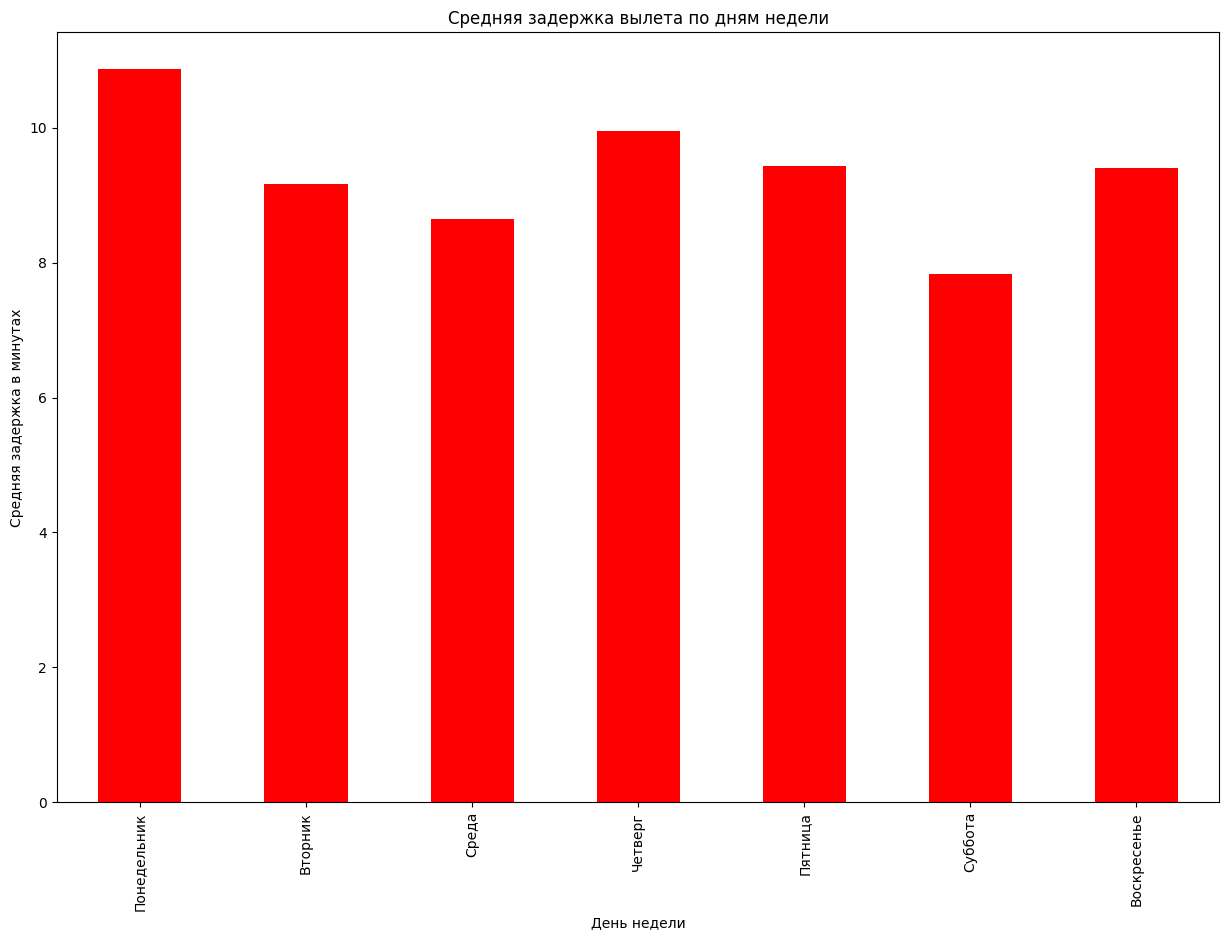

In [5]:
delays_week = flights.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].mean()

plt.figure(figsize=(15, 10))
delays_week.plot(kind='bar', color='red')
plt.title('Средняя задержка вылета по дням недели')
plt.xlabel('День недели')
plt.ylabel('Средняя задержка в минутах')
plt.xticks(ticks=range(7), labels=['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'])
plt.show()


Понятно, почему в понедельник и пятницу наибольшие задержки, ведь это начало и конец рабочей недели соответственно. Но нужно разобраться с четвергом.

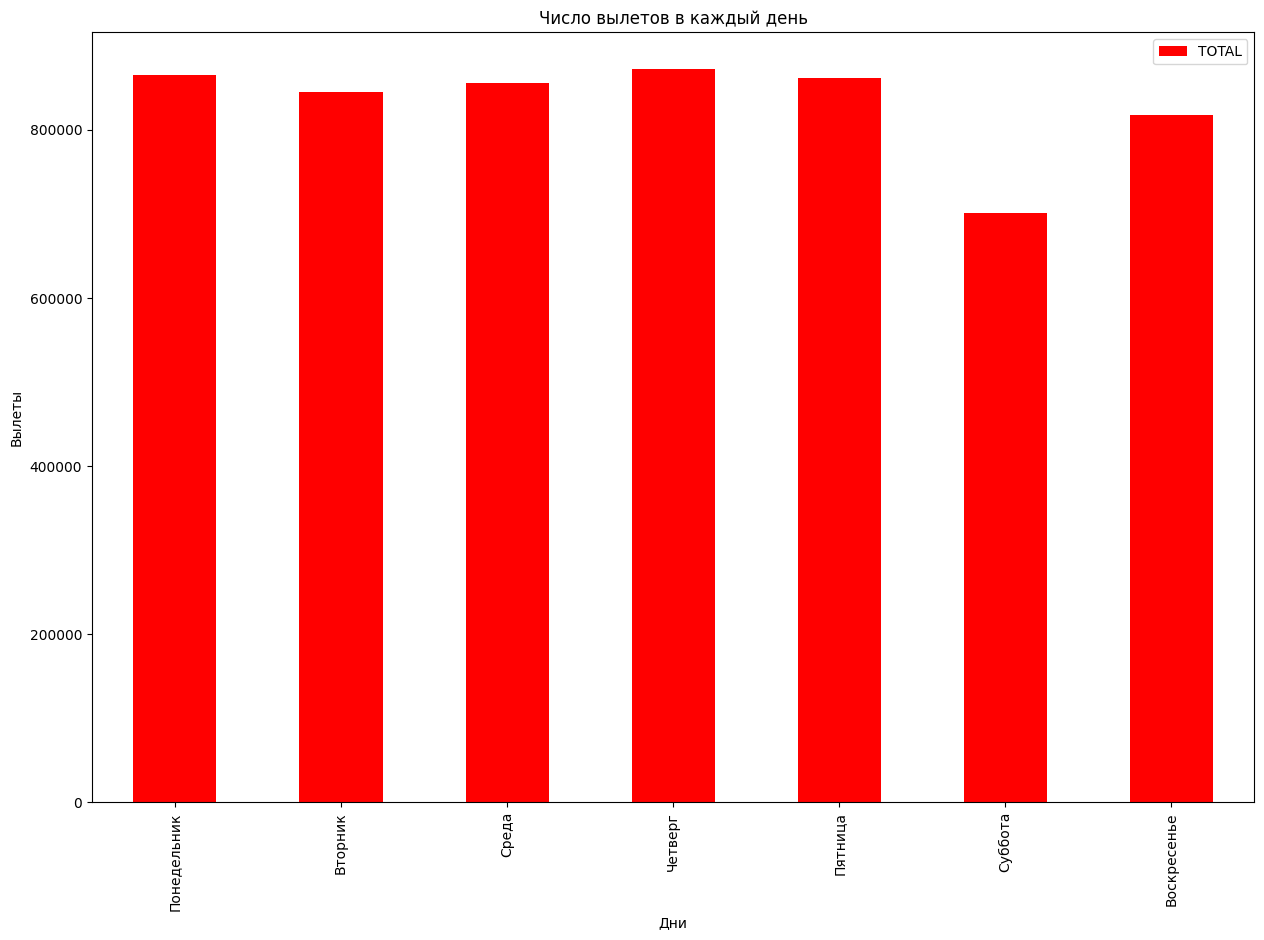

In [6]:
flights_stats = flights.groupby('DAY_OF_WEEK').size().reset_index(name='TOTAL')
weekday_names = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']
flights_stats['DAY_OF_WEEK'] = flights_stats['DAY_OF_WEEK'].map(lambda x: weekday_names[x-1])

flights_stats.plot(kind='bar', color='red', figsize=(15, 10))
plt.title('Число вылетов в каждый день')
plt.xlabel('Дни')
plt.ylabel('Вылеты')
plt.xticks(ticks=range(7), labels=['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'])
plt.show()

Видим, что в эти 3 дня наибольшее количество вылетов. Особенно в четверг. Этим и объясняются задержки в этот день


## Задержки по времени

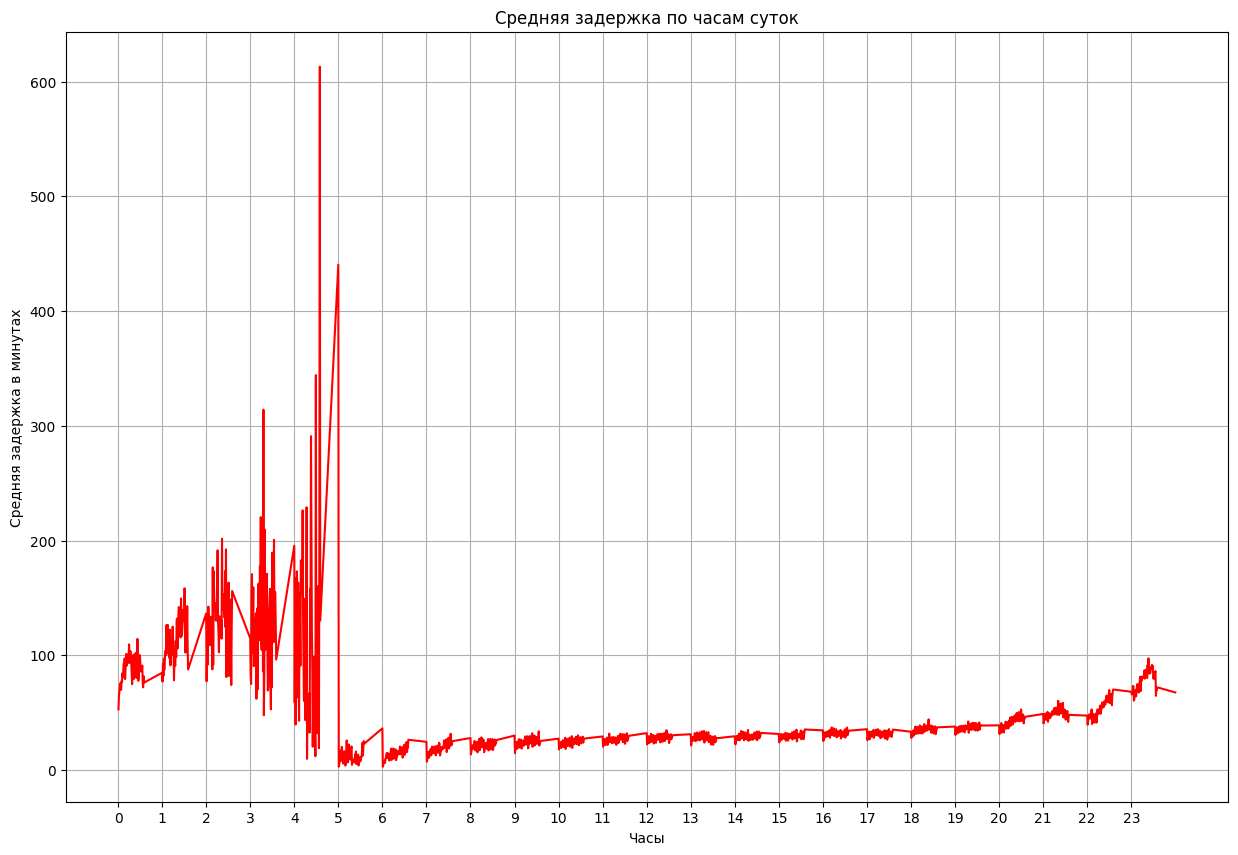

In [7]:
delayed_flights = flights[flights['DEPARTURE_DELAY'] > 0]
avg_delay_by_time = delayed_flights.groupby('DEPARTURE_TIME')['DEPARTURE_DELAY'].mean().reset_index(name='AVG_DELAY')

plt.figure(figsize=(15, 10))
plt.plot(avg_delay_by_time['DEPARTURE_TIME'] / 100, avg_delay_by_time['AVG_DELAY'], color='red')

plt.grid()
plt.xlabel('Часы')
plt.ylabel('Средняя задержка в минутах')
plt.title('Средняя задержка по часам суток')
plt.xticks(ticks=range(0, 24), labels=[str(i) for i in range(24)])

plt.show()


Ну тут всё гораздо прозрачнее. Большинство задержек ночью и очень ранним утром. Это может быть связано с трудностями ночных перелётов, а также с нехваткой сотрудников.

## Задержки по авиакомпаниям

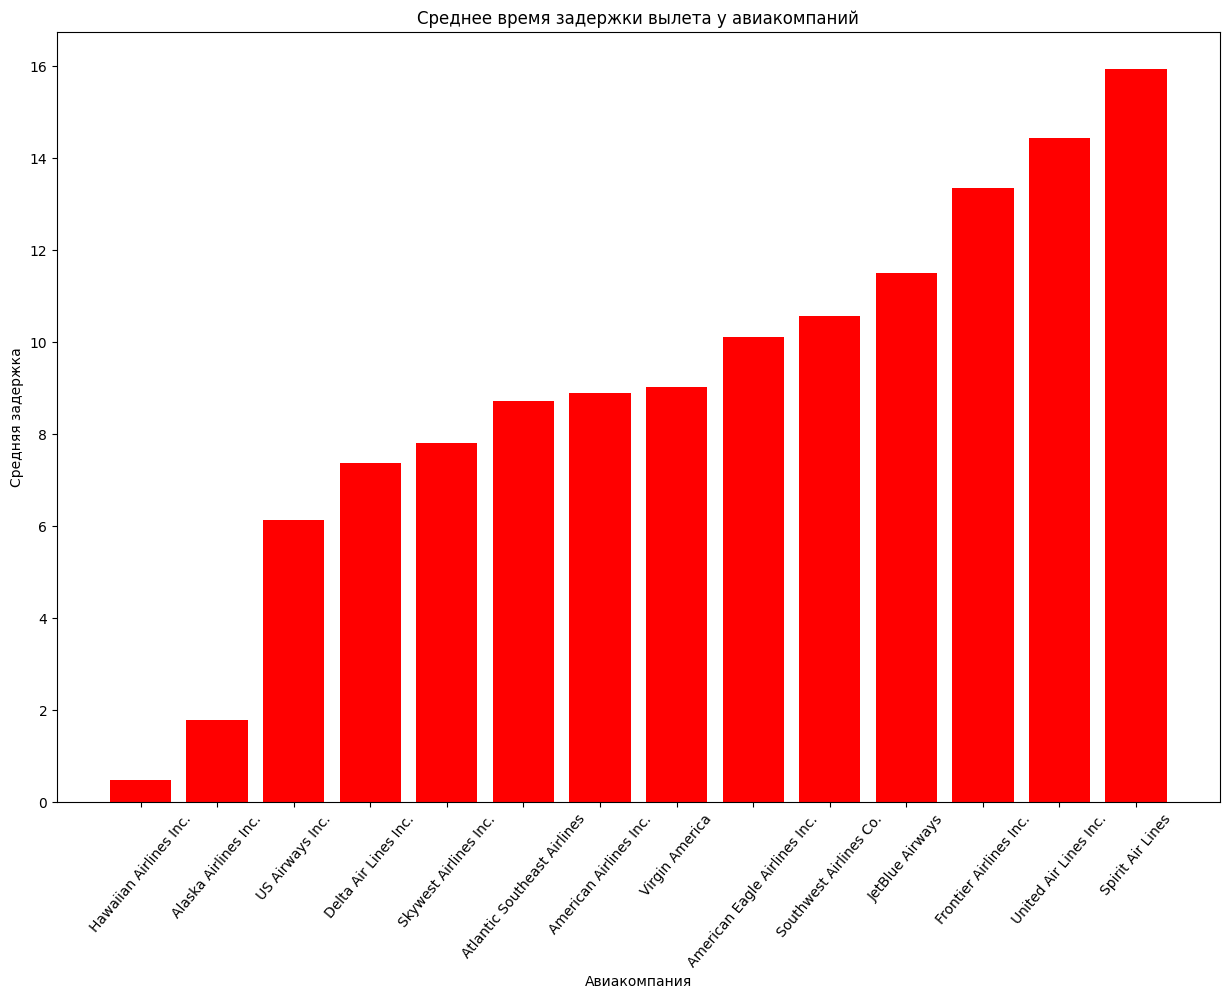

In [8]:
filtered_flights = flights[flights['DEPARTURE_DELAY'].notna()].copy()
flights_with_airlines = pd.merge(filtered_flights, airlines, left_on='AIRLINE', right_on='IATA_CODE', how='left')
airlineavgdelay = flights_with_airlines.groupby('AIRLINE_y')['DEPARTURE_DELAY'].mean().sort_values().reset_index(name = 'DELAY_AVG')
plt.figure(figsize=(15, 10))
bars = plt.bar(airlineavgdelay['AIRLINE_y'], airlineavgdelay['DELAY_AVG'], color = 'red')

plt.title('Среднее время задержки вылета у авиакомпаний')
plt.xlabel('Авиакомпания')
plt.ylabel('Средняя задержка')
plt.xticks(rotation=50)
plt.show()




Тут всё итак понятно. Кое-каким компаниям следует быть более пункутальными. Но не мне их осуждать.

## Задержки по аэропортам

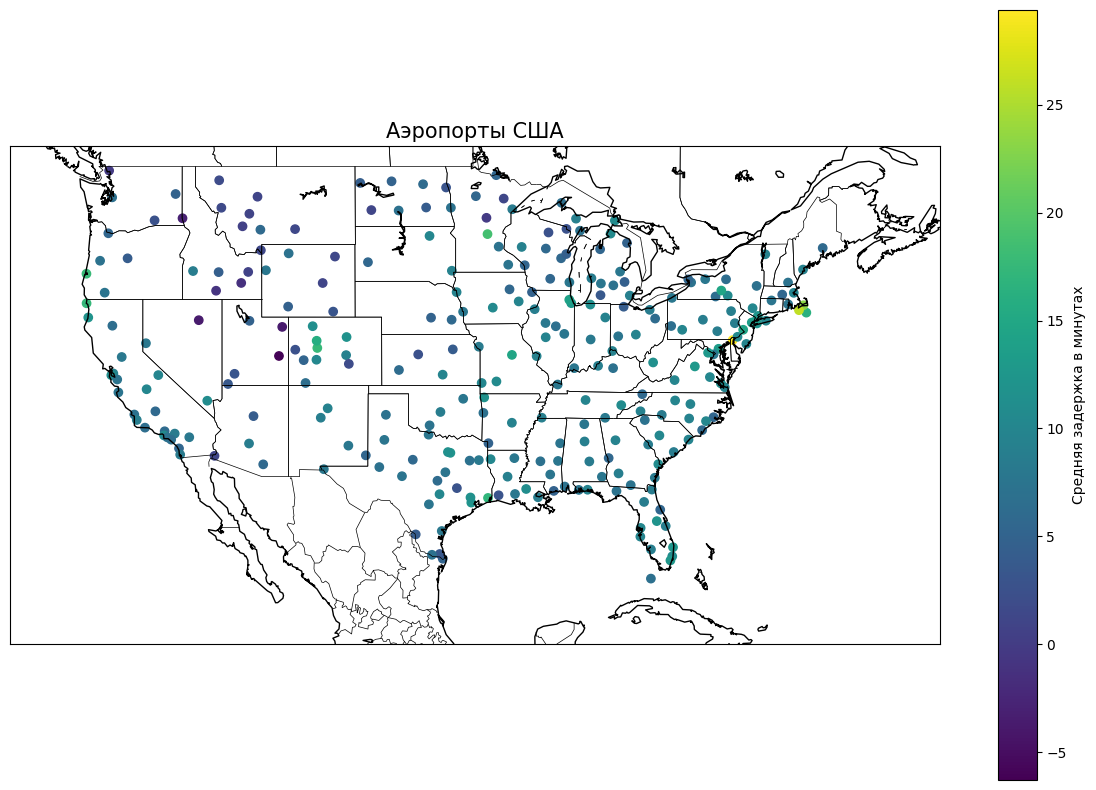

In [9]:
#добрые люди подсказали
#!pip install basemap --user

from mpl_toolkits.basemap import Basemap

delays_by_airport = flights.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean().reset_index()
flights_with_airports = pd.merge(delays_by_airport, airports, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE')


plt.figure(figsize=(15, 10))
m = Basemap(
    projection='merc',
    llcrnrlat=20,
    urcrnrlat=50,
    llcrnrlon=-130,
    urcrnrlon=-60,
    resolution='l'
)

m.drawcoastlines()
m.drawcountries()
m.drawstates()


x, y = m(flights_with_airports['LONGITUDE'].values, flights_with_airports['LATITUDE'].values)


scatter = m.scatter(x, y, c=flights_with_airports['DEPARTURE_DELAY'])

cbar = plt.colorbar(scatter, label='Средняя задержка в минутах')

plt.title('Аэропорты США', fontsize=15)
plt.show()

**Вывод**

Мы проанализировали задержки в аэропортах по дням недели и времени суток. Помимо этого мы также установили возможные причины этих задержек. Кроме того, наглядно изобразили аэропорты на карте США, выделили самые непунктуальные, а также разобрались, какие авиакомпании больше всех страдают от задержек.